<a href="https://colab.research.google.com/github/Huynhngocthaiduy/Optimization-algorithms/blob/main/Practical_Exam_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Session - Final

Student(s):

## 1. Problem selection

Choose one of the two following problems (delete the other cell).
You can find extra information regarding both problems and their associated models in
the main course.

### Problem 1: Single-Machine Scheduling

**Variables:**

- $x_{ij}$ - Binary variable indicating if $i$ is manufactured before $j$.
- $s_{i}$ - Continuous variable indicating the starting time of task $i$.
- $y_{i}$ - Binary variable indicating if the item $i$ is overdue.

**Model:**

$$
    \begin{align}
      \text{min.} \quad & \sum_{j=1}^{n} y_{i}                 &                                           \\
      \text{s.t.} \quad & s_j \geq s_i + p_i - M^1_{ij} (1 - x_{ij}), & \forall i,j \in L,\ i \ne j \\
                        & s_i + p_i \leq d_i + M^2_{i} y_i,          & \forall i \in L             \\
                        & x_{ij} + x_{ji} = 1,                 & \forall i,j \in L,\ i \ne j \\
                        & x_{ij} \in \left\{0,~1\right\},      & \forall i,j \in L                         \\
                        & y_{i} \in \left\{0,~1\right\},       & \forall i \in L                           \\
                        & s_{i} \geq r_{i},                    & \forall i \in L
    \end{align}
$$

## 2. Preparation

### 2.1. Instance

Implement a class to hold the various data parameters required for the problem (e.g.,
manufacturing time or aircraft target landing time).
Your class can be a simple data holder with various fields or can contain extra methods
for later use.

In [ ]:
pip install colorama

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
class Instance:
    # TODO
    def __init__(self, numbre_jobs, processing_times, release_times, due_dates):
        # List of items n
        self.numbre_jobs = numbre_jobs
        # Lanufacturing time p
        self.processing_times = processing_times
        # Release time r
        self.release_times = release_times
        # Deadline d
        self.due_dates = due_dates
    def print_instance(self):
        print("Job    Processing time   Release time    Due date")

        for j in range(self.numbre_jobs):
            print(f"  {j}                 {self.processing_times[j]} "
                  f"        {self.release_times[j]}             {self.due_dates[j]} .\n")


## Example of in instance

### 2.2. Solution

Implement a to hold a proper solution for the chosen problem.
Your class should not contain the values for all variables in your model but only the
relevant ones.

In [ ]:
from colorama import Fore, Style
import matplotlib.pyplot as plt
import numpy as np
import random

class Solution:
    def __init__(self,instance,schedule):
        self.instance = instance
        self.schedule = schedule
        self.xij = None
        self.yi = None



    # xij — Binary variable indicating if i is manufactured before j-------------------------------------------------------------------
    def calculate_xij(self):
        xij = [[0] * self.instance.numbre_jobs for _ in range(self.instance.numbre_jobs)]
        for i in range(self.instance.numbre_jobs):
            for j in range(i + 1, self.instance.numbre_jobs):
                if self.schedule[i] < self.schedule[j]:
                    xij[i][j] = 1
                    xij[j][i] = 0
                elif self.schedule[i] > self.schedule[j]:
                    xij[i][j] = 0
                    xij[j][i] = 1
                else:
                    xij[i][j] = 0
                    xij[j][i] = 1

        self.xij = xij
        # yi Binary variable indicating if the item i is overdue-------------------------------------------------------------------------
    def calculate_yi(self):
        completion_times = [self.schedule[i] + self.instance.processing_times[i] for i in range(self.instance.numbre_jobs)]
        self.yi = [1 if completion_times[i] > self.instance.due_dates[i] else 0 for i in range(self.instance.numbre_jobs)]

        # objective value------------------------------------------------------------------------------------------------------------------
    def objective_value(self) -> int:
        if self.yi is None:
            # If yi has not been calculated, compute it automatically
            self.calculate_yi()
        return sum(self.yi)

        # print all the infomation of instance and solution--------------------------------------------------------------------------------------
    def print_info(self):
        if self.xij is None:
            # If xij has not been calculated, compute it automatically
            self.calculate_xij()
        if self.yi is None:
            # If yi has not been calculated, compute it automatically
            self.calculate_yi()
        if self.objective_value() is None:
            # If objective_value has not been calculated, compute it automatically
            self.objective_value()

        print("Job   Starting Times  Processing time   Release time    Due date")

        for j in range(self.instance.numbre_jobs):
            if self.yi[j] == 1:
                # print the overdue jobs in red
                print(f"  {j}        {Fore.RED}{self.schedule[j]}             {self.instance.processing_times[j]}               {self.instance.release_times[j]}             {self.instance.due_dates[j]}{Style.RESET_ALL} .\n")
            else:
                print(f"  {j}        {self.schedule[j]}             {self.instance.processing_times[j]}               {self.instance.release_times[j]}             {self.instance.due_dates[j]} .\n")

        print(f"Binary variable indicating if the item i is overdue: {self.yi}")
        print(f"Objective Value (Number of Overdue Items): {self.objective_value()}")
        print("Binary variable indicating if i is manufactured before j .\n")
        for row in self.xij:
            print(row)
        # Visualisation solution-----------------------------------------------------------------------
    def visualize(self):
        plt.figure(figsize=(10, 5))

        # Define a color map for different jobs
        colors = plt.cm.viridis(np.linspace(0, 1, self.instance.numbre_jobs))

        for i in range(self.instance.numbre_jobs):
            job_start = self.schedule[i]
            job_end = job_start + self.instance.processing_times[i]

            # Use a different color for each job
            plt.barh(y=i, width=job_end - job_start, left=job_start, color=colors[i], alpha=0.7, label=f'Job {i}')
            plt.text(job_start + 0.5 * (job_end - job_start), i, f'Job {i}', ha='center', va='center', color='white', fontweight='bold')

        # Set x-axis limit to the sum of processing times
        plt.xlim(0, sum(self.instance.processing_times))

        plt.xlabel('Time')
        plt.ylabel('Jobs')
        plt.title('Gantt Chart for Single-Machine Scheduling')
        plt.yticks(np.arange(self.instance.numbre_jobs), [f'Job {i}' for i in range(self.instance.numbre_jobs)])
        plt.grid(axis='x')
        #plt.legend()
        plt.show()



In [ ]:
def bigM(instance):
    max_value = max(instance.release_times[i] + sum(instance.processing_times) for i in range(instance.numbre_jobs))
    return max_value

In [ ]:
def check_solution(solution: Solution) -> bool:
    check = True
    if solution.xij is None:
     # If xij has not been calculated, compute it automatically-----------------------------------------------------------------
            solution.calculate_xij()
    if solution.yi is None:
            # If yi has not been calculated, compute it automatically
            solution.calculate_yi()
    M = bigM(solution.instance)
    # Make sure the jobs start after release time
    for  j in range(solution.instance.numbre_jobs):
        if solution.schedule[j] < solution.instance.release_times[j]:
            print(f"Job {j} starts before its release time.")
            check = False
    # Make sure that only one jobs running --------------------------------------------------------------------------------------
    for  i in range(solution.instance.numbre_jobs):
        for  j in range(solution.instance.numbre_jobs):
            if i != j:
                if solution.xij[i][j] == 1:
                    if solution.schedule[j] >= solution.schedule[i]+solution.instance.processing_times[i]+ M*(1-solution.xij[i][j]):
                       check = check and True
                    else:
                        print(f"The job {i} and {j} process at a time")
                        check = False
      # Constraint on due_date
    for i in range(solution.instance.numbre_jobs):
        if solution.schedule[i]+solution.instance.processing_times[i] <= solution.instance.due_dates[i]+ M*solution.yi[i]:
            check = check and True
        else:
            check = check and False
            print(f"Schedule {i} problem due date")
    if check == True:
        print("Solution is valid.")
    else:
        print("Solution is  not valid")
    return check

## Example of instante and solution

In [ ]:
# Number of jobs
numbre_jobs1 = 10

# Generate processing times, release times, due dates, and (schedule)
processing_times = [15, 10, 12, 20, 18, 25, 30, 22, 17, 28]
release_times = [0, 2, 20, 8, 10, 12, 15, 18, 20, 22]
due_dates = [4, 5, 30, 5, 45, 60, 70, 55, 36, 65]
schedule = [0, 2, 15, 8, 10, 12, 15, 18, 20, 37]


# Creating instance and sulotion
instance1 = Instance(numbre_jobs1, processing_times, release_times, due_dates)
solution1 = Solution(instance1, schedule)

# Calculating and printing the objective value



check_solution(solution1)
solution1.print_info()


Job 2 starts before its release time.
The job 0 and 1 process at a time
The job 0 and 3 process at a time
The job 0 and 4 process at a time
The job 0 and 5 process at a time
The job 1 and 3 process at a time
The job 1 and 4 process at a time
The job 2 and 7 process at a time
The job 2 and 8 process at a time
The job 3 and 2 process at a time
The job 3 and 4 process at a time
The job 3 and 5 process at a time
The job 3 and 6 process at a time
The job 3 and 7 process at a time
The job 3 and 8 process at a time
The job 4 and 2 process at a time
The job 4 and 5 process at a time
The job 4 and 6 process at a time
The job 4 and 7 process at a time
The job 4 and 8 process at a time
The job 5 and 2 process at a time
The job 5 and 6 process at a time
The job 5 and 7 process at a time
The job 5 and 8 process at a time
The job 6 and 2 process at a time
The job 6 and 7 process at a time
The job 6 and 8 process at a time
The job 6 and 9 process at a time
The job 7 and 8 process at a time
The job 7 

Implement the function below to check if a solution is valid or not.

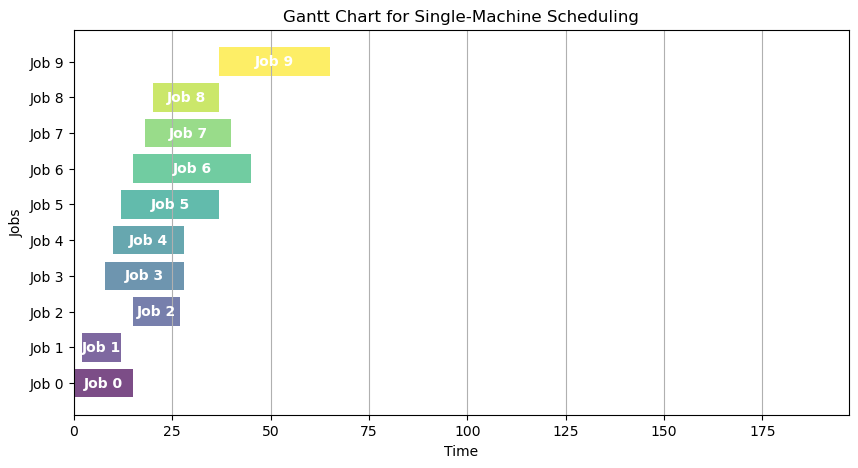

In [ ]:
solution1.visualize()

Solution is valid.
Job   Starting Times  Processing time   Release time    Due date
  0        0             12               0             34 .

  1        13             16               0             31 .

  2        30             24               0             22 .

  3        55             25               0             29 .

  4        81             21               0             44 .

  5        103             28               0             33 .

  6        132             18               0             24 .

Binary variable indicating if the item i is overdue: [0, 0, 1, 1, 1, 1, 1]
Objective Value (Number of Overdue Items): 5
Binary variable indicating if i is manufactured before j .

[0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0]


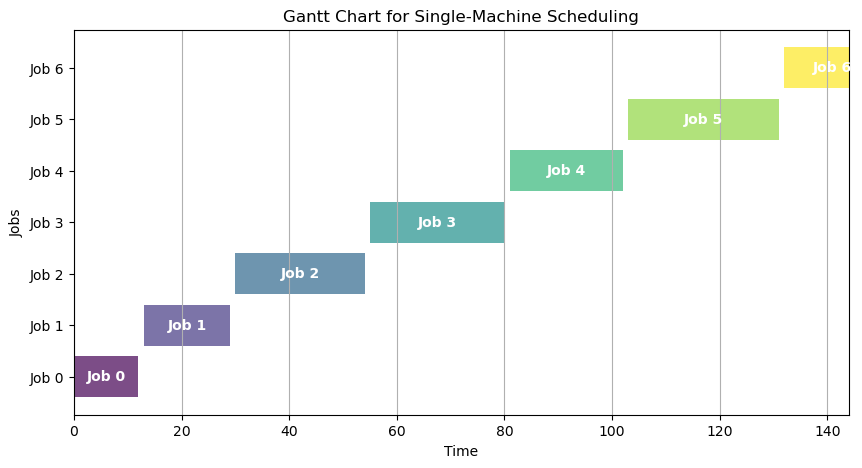

In [ ]:
numbre_jobs2 = 7
processing_times = [random.randint(10, 30) for _ in range(numbre_jobs2)]
release_times = [random.randint(0,0) for _ in range(numbre_jobs2)]
due_dates = [release_times[i] + random.randint(20, 50) for i in range(numbre_jobs2)]
# Creating a new instance
new_instance = Instance(numbre_jobs2, processing_times, release_times, due_dates)

# Generating a valid solution
valid_solution = list(range(numbre_jobs2))
for i in range(numbre_jobs2 -1):
    valid_solution[i+1] = valid_solution[i]+new_instance.processing_times[i]+1
new_solution = Solution(new_instance, valid_solution)

#check new solution

check_solution(new_solution)
new_solution.print_info()
new_solution.visualize()

### 2.3. Data Generation

Propose, explain and implement a method to generate instances of various sizes (e.g.,
number of items or number of aircraft).

In [ ]:
import random

def generate_instance(size: int, rng: random.Random = random.Random()) -> Instance:
    processing_times = [rng.randint(1, 20) for _ in range(size)]
    release_times = [rng.randint(0, 10) for _ in range(size)]
    due_dates = [release_times[i] + rng.randint(20, 50) for i in range(size)]

    return Instance(size, processing_times, release_times, due_dates)


## 3. Model implementation

### 3.1. Model

Implement the function below that should create an appropriate `docplex` model
given an instance of the chosen problem.

Use appropriate values for the big-$M$ constants in the model.

In [ ]:
from docplex.mp.model import Model

def model_for(instance: Instance,M = bigM(instance)) -> Model:

    # Create a model
    mdl = Model(name='single_machine_scheduling')

    # Decision variables
    x = {(i, j): mdl.binary_var(name=f'x_{i}_{j}') for i in range(instance.numbre_jobs) for j in range(instance.numbre_jobs)}
    s = {i: mdl.continuous_var(name=f's_{i}') for i in range(instance.numbre_jobs)}
    y = {i: mdl.binary_var(name=f'y_{i}') for i in range(instance.numbre_jobs)}

    # Objective function
    objective_expr = mdl.sum(y[i] for i in range(instance.numbre_jobs))
    mdl.minimize(objective_expr)

    # Constraints
    for i in range(instance.numbre_jobs):
        for j in range(instance.numbre_jobs):
            if i != j:
                mdl.add_constraint(s[j] >= s[i] + instance.processing_times[i] - M * (1 - x[i, j]))
                mdl.add_constraint(mdl.sum(x[i, j] + x[j, i]) == 1)
        mdl.add_constraint(s[i] + instance.processing_times[i] <= instance.due_dates[i] + M * y[i])
        mdl.add_constraint(s[i] >= instance.release_times[i])

    return mdl


### 3.2. Resolution

Complete the function below to construct a proper `Solution` from the obtained
`docplex` solution.

In [ ]:
from docplex.mp.model import Model
import pandas as pd
def solve(instance: Instance) -> Solution | None:
    model = model_for(instance)

    # enable logging
    model.log_output = True

    # solve
    solution = model.solve()

    if not solution:
        return None
        # Extract schedule from the solution and return it
    schedule = [solution.get_var_value(model.get_var_by_name(f's_{i}')) for i in range(instance.numbre_jobs)]
    return Solution(instance, schedule)


In [ ]:
instance = generate_instance(15)
my_solution = solve(instance)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 12.000000 after 0.00 sec. (0.03 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 120 rows and 15 columns.
Aggregator did 105 substitutions.
Reduced MIP has 225 rows, 135 columns, and 660 nonzeros.
Reduced MIP has 120 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.75 ticks)
Probing time = 0.00 sec. (0.40 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 225 rows, 135 columns, and 660 nonzeros.
Reduced MIP has 120 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.41 ticks)
Probing time = 0.00 sec. (0.40 ticks)
Clique table members: 60.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (0.46 ticks)

        Nodes                                   

In [ ]:
my_solution.print_info()

In [ ]:
my_solution.visualize()

## 4. Evaluation

### 4.1. Simple evaluation

Evaluate the model and solution implemented above on various instances generated by
your method.

What size of instances can your model solve? Which parameters have the biggest impact
on the resolution time?

In [ ]:
import time
import matplotlib.pyplot as plt


current_size = 5
sizes = []
times = []

while True:
    instance = generate_instance(current_size)
    print(f"Testing with {current_size} jobs...")

    start_time = time.time()  # Record the start time
    solve(instance)
    end_time = time.time()    # Record the end time

    elapsed_time = end_time - start_time
    print(f"Solving time: {elapsed_time:.4f} seconds")
    print("-----------------------------")

    sizes.append(current_size)
    times.append(elapsed_time)

    current_size += 1

    # Add a condition to stop
        break

# Plotting the results
plt.plot(sizes, times, marker='o')
plt.title('Solving Time vs. Instance Size')
plt.xlabel('Number of Jobs')
plt.ylabel('Solving Time (seconds)')
plt.grid(True)
plt.show()


Testing with 5 jobs...
Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 15 rows and 5 columns.
Aggregator did 10 substitutions.
Reduced MIP has 25 rows, 20 columns, and 70 nonzeros.
Reduced MIP has 15 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.08 ticks)
Found incumbent of value 5.000000 after 0.00 sec. (0.12 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve modified 1 coefficients.
Reduced MIP has 25 rows, 20 columns, and 70 nonzeros.
Reduced MIP has 15 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.04 ticks)
Probing time = 0.00 sec. (0.02 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (0.03 ticks)

        Nodes            

      0     0        0.0000     9        4.0000      Cuts: 31      130  100.00%
Detecting symmetries...
*     0+    0                            3.0000        0.0000           100.00%
Detecting symmetries...
      0     2        0.0000     9        3.0000        0.0000      130  100.00%
Elapsed time = 0.04 sec. (4.05 ticks, tree = 0.02 MB, solutions = 3)

Clique cuts applied:  1
Implied bound cuts applied:  19
Flow cuts applied:  3
Mixed integer rounding cuts applied:  24
Gomory fractional cuts applied:  1

Root node processing (before b&c):
  Real time             =    0.04 sec. (4.02 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.07 sec. (2.54 ticks)
  Sync time (average)   =    0.06 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.10 sec. (6.56 ticks)
Solving time: 0.1194 seconds
-----------------------------
Testing with 9 jobs...
Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_Dat

Implied bound cuts applied:  1
Flow cuts applied:  2
Mixed integer rounding cuts applied:  9
Zero-half cuts applied:  1

Root node processing (before b&c):
  Real time             =    0.04 sec. (12.27 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.04 sec. (12.27 ticks)
Solving time: 0.0595 seconds
-----------------------------
Testing with 12 jobs...
Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 78 rows and 12 columns.
Aggregator did 66 substitutions.
Reduced MIP has 144 rows, 90 columns, and 420 nonzeros.
Reduced MIP has 78 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.47 ticks)
Found incumbent of value 12.000000 after 0.00 sec. (0.68 ticks)
Probing time = 0.00 se

Presolve time = 0.00 sec. (0.27 ticks)
Tried aggregator 1 time.
Reduced MIP has 196 rows, 119 columns, and 574 nonzeros.
Reduced MIP has 105 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.36 ticks)
Represolve time = 0.01 sec. (1.46 ticks)
   8752     0        2.3333    50        7.0000     Cuts: 139    67800   28.57%
   8752     0        3.0000    42        7.0000     Cuts: 149    67889   28.57%
   8752     0        3.0000    46        7.0000     Cuts: 100    67983   28.57%
   8752     0        3.0000    25        7.0000      Cuts: 28    68029   28.57%
   8752     0        3.0000    52        7.0000     Cuts: 118    68119   28.57%
   8752     0        3.0000    43        7.0000     Cuts: 149    68208   28.57%
   8752     0        3.0000    47        7.0000     Cuts: 142    68289   28.57%
   8752     0        3.0000    25        7.0000      Cuts: 65    68335   28.57%
   8752     0        3.0000    40        7.0000     Cuts: 101    68403   28.57%

Clique cut

Elapsed time = 0.10 sec. (44.24 ticks, tree = 0.02 MB, solutions = 5)

Performing restart 1

Repeating presolve.
Tried aggregator 1 time.
MIP Presolve modified 8 coefficients.
Reduced MIP has 256 rows, 152 columns, and 752 nonzeros.
Reduced MIP has 136 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.35 ticks)
Tried aggregator 1 time.
Reduced MIP has 256 rows, 152 columns, and 752 nonzeros.
Reduced MIP has 136 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.46 ticks)
Represolve time = 0.01 sec. (2.31 ticks)
   6435     0        3.0000    42        8.0000     Cuts: 135    73782   37.50%
   6435     0        3.0000    44        8.0000     Cuts: 112    73857   37.50%
   6435     0        3.0000    43        8.0000      Cuts: 67    73921   37.50%
   6435     0        3.0000    48        8.0000      Cuts: 76    73996   37.50%
   6435     0        3.0000    47        8.0000     Cuts: 104    74075   37.50%
   6435     2        3.0000   

      0     0        1.0123    58       13.0000      Cuts: 88      422   92.21%
      0     0        1.0267    58       13.0000     Cuts: 135      498   92.10%
*     0+    0                           12.0000        1.0267            91.44%
Detecting symmetries...
      0     0        1.0398    45       12.0000     Cuts: 104      555   91.34%
      0     0        1.0532    57       12.0000     Cuts: 101      615   91.22%
      0     0        1.0700    56       12.0000      Cuts: 51      672   91.08%
      0     0        1.5000    48       12.0000      Cuts: 51      728   87.50%
      0     0        2.0000    47       12.0000     Cuts: 149      799   83.33%
      0     0        2.0000    50       12.0000     Cuts: 111      860   83.33%
      0     0        2.0000    34       12.0000      Cuts: 17      894   83.33%
      0     0        2.0000    58       12.0000     Cuts: 137      969   83.33%
*     0+    0                            8.0000        2.0000            75.00%
Detecting symmet

 203032 44086        7.0000    21        9.0000        6.0000  4142961   33.33%
 209529 46218    infeasible              9.0000        6.0000  4440578   33.33%
 216962 46177        6.0242    26        9.0000        6.0000  4598980   33.33%
 226444 48087    infeasible              9.0000        6.0000  4918156   33.33%
 233086 47242    infeasible              9.0000        6.0009  5069258   33.32%
 243887 45141        7.0311    19        9.0000        6.0242  5342968   33.06%
 253614 42783        7.1351    11        9.0000        6.7000  5612939   25.56%
Elapsed time = 33.58 sec. (22391.91 ticks, tree = 15.95 MB, solutions = 6)
 269181 39152        7.0293    15        9.0000        7.0000  5832266   22.22%
 280640 37619        8.0000     9        9.0000        7.0000  6034926   22.22%
 292896 35143    infeasible              9.0000        7.0000  6208011   22.22%
 306323 33749    infeasible              9.0000        7.0000  6467445   22.22%
 314712 31214        7.0000    20        9.00

 131063 16093       11.0000    22       12.0000       10.0000  4919571   16.67%
 135488 14403       11.0000    33       12.0000       10.0000  5131023   16.67%
 139926 12646        cutoff             12.0000       10.0000  5336397   16.67%
 144544 11025    infeasible             12.0000       10.0000  5576740   16.67%
Elapsed time = 32.74 sec. (22483.47 ticks, tree = 5.57 MB, solutions = 6)
 158210  1498    infeasible             12.0000       11.0000  5896143    8.33%

Clique cuts applied:  45
Cover cuts applied:  220
Implied bound cuts applied:  149
Flow cuts applied:  48
Mixed integer rounding cuts applied:  283
Zero-half cuts applied:  4
Lift and project cuts applied:  5
Gomory fractional cuts applied:  25

Root node processing (before b&c):
  Real time             =    0.13 sec. (87.06 ticks)
Parallel b&c, 12 threads:
  Real time             =   34.12 sec. (23460.63 ticks)
  Sync time (average)   =    5.11 sec.
  Wait time (average)   =    0.02 sec.
                          -----

 140050 16138       12.0000    46       14.0000       10.0000  3835850   28.57%
 147282 17044       12.0000    15       14.0000       10.0000  4071298   28.57%
 154000 17948       10.0426    31       14.0000       10.0000  4256942   28.57%
 160795 18946       13.0000    40       14.0000       10.0000  4461863   28.57%
 167856 19447        cutoff             14.0000       10.0000  4626786   28.57%
Elapsed time = 30.76 sec. (22455.03 ticks, tree = 7.79 MB, solutions = 5)
 175038 20345       13.0000    10       14.0000       10.0233  4886163   28.41%
 180519 19590    infeasible             14.0000       10.3529  5095540   26.05%
 189202 18963       12.0306    12       14.0000       11.0000  5229736   21.43%
 197218 18189       12.0000     9       14.0000       11.0000  5446890   21.43%
 203633 17590       11.0251    25       14.0000       11.0000  5612536   21.43%
 209936 17299       12.0073    28       14.0000       11.0000  5802289   21.43%
 216485 17043       11.0000    32       14.000

 202713 79688        cutoff             13.0000        8.0766  4397733   37.87%
Elapsed time = 32.19 sec. (22506.59 ticks, tree = 33.51 MB, solutions = 5)
 210651 80134        9.0000    17       13.0000        8.3007  4683762   36.15%
 221483 80092       11.0000    30       13.0000        8.8182  4802754   32.17%
 229898 84025        cutoff             13.0000        9.0000  4972185   30.77%
 243290 87987       11.0000    22       13.0000        9.0000  5157825   30.77%
 251371 88555       12.0000    18       13.0000        9.0000  5287935   30.77%
 261321 92534       12.0000     9       13.0000        9.0000  5454086   30.77%
 274015 93740    infeasible             13.0000        9.0000  5623040   30.77%
 278602 96965        cutoff             13.0000        9.0000  5806837   30.77%
 291044 98206        9.0523    28       13.0000        9.0000  5927064   30.77%
 295367 101355       10.0000    31       13.0000        9.0000  6126742   30.77%
Elapsed time = 46.41 sec. (32044.46 ticks, t

 1421205 12170       12.0000     6       13.0000       12.0000 28120679    7.69%
 1453069    18       12.0000    12       13.0000       12.0000 28514533    7.69%

Clique cuts applied:  45
Cover cuts applied:  767
Implied bound cuts applied:  140
Flow cuts applied:  33
Mixed integer rounding cuts applied:  395
Zero-half cuts applied:  4
Lift and project cuts applied:  4
Gomory fractional cuts applied:  40

Root node processing (before b&c):
  Real time             =    0.12 sec. (78.45 ticks)
Parallel b&c, 12 threads:
  Real time             =  255.29 sec. (180268.05 ticks)
  Sync time (average)   =   39.02 sec.
  Wait time (average)   =    0.15 sec.
                          ------------
Total (root+branch&cut) =  255.41 sec. (180346.51 ticks)
Solving time: 255.4795 seconds
-----------------------------
Testing with 23 jobs...
Using size restricted mode (Could not find directory for cpxchecklic).
CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm

DOcplexLimitsExceeded: **** Promotional version. Problem size limits (1000 vars, 1000 consts) exceeded, model has 575 vars, 1058 consts, CPLEX code=1016

## What size of instances can your model solve?
The total number of constraints is 𝑛 * 𝑛 + 3𝑛 + 𝑛 * (𝑛-1), and the total number of decision variables is 𝑛 * 𝑛 + 2𝑛.  with the limit of 1000 variables and 1000 constraints, 𝑛 = 22 would be close to the limit.

## Which parameters have the biggest impact on the resolution time?
The size of the problem (number of jobs) is the beggest impact on the resolution time

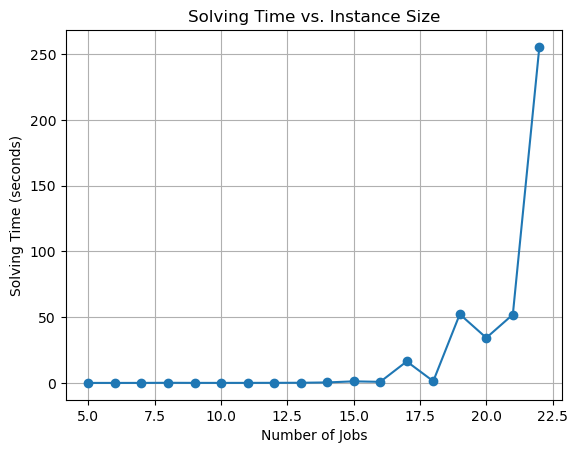

In [ ]:
# Plotting the results
plt.plot(sizes, times, marker='o')
plt.title('Solving Time vs. Instance Size')
plt.xlabel('Number of Jobs')
plt.ylabel('Solving Time (seconds)')
plt.grid(True)
plt.show()

### 4.2. Relaxation

Evaluate the impact of having tighter big-$M$ values in your model to the appropriate
relaxation.

**Tips:**

- Adapt the `model_for` function (or create a new one) to easily change the big-$M$
  values.
- You can use the following code to solve the relaxation of your model:

```python
from docplex.mp.relax_linear import LinearRelaxer

lp = LinearRelaxer.make_relaxed_model(model)
solution_relaxed = lp.solve(log_output=True)
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from docplex.mp.relax_linear import LinearRelaxer

instance = generate_instance(10)
model = model_for(instance)
lp = LinearRelaxer.make_relaxed_model(model)
solution_relaxed = lp.solve(log_output=True)
schedule_relaxed = [solution_relaxed.get_var_value(model.get_var_by_name(f's_{i}')) for i in range(10)]

#for v in lp.iter_continuous_vars():
    #print(f"{v}, = ,{v.solution_value}")

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 55 rows and 10 columns.
Aggregator did 45 substitutions.
Reduced LP has 100 rows, 65 columns, and 290 nonzeros.
Presolve time = 0.00 sec. (0.17 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =             0.000000


DOcplexException: Cannot mix objects from different models in new_binary_constraint. obj1=s_0, obj2=s_0

### 4.3. Visualization (Bonus)

Propose a method to visualize the instance and solution obtained by your model using
library such as `matplotlib`.